In [4]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
city_path = os.path.join('raw_data', 'city_data.csv')
ride_path = os.path.join('raw_data', 'ride_data.csv')

city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)
#city_data.head()

In [81]:
#ride_data.head(1)


In [7]:
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

In [8]:
combined_data_df = pd.merge(city_data, ride_data, on="city", how="outer")
combined_data_df.head()



,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [58]:
# URBAN RIDE INFO

urban_data = combined_data_df.loc[combined_data_df["type"] == "Urban"]#.count()
urban_data = pd.DataFrame(urban_data)

urban_data.head()

urban_places = urban_data.groupby("city")

urban_fares_avg = urban_places['fare'].mean()
urban_fares_avg = pd.DataFrame(urban_fares_avg).reset_index()
#urban_fares_avg.head()

# * Total Number of Rides Per City
urban_rides = urban_places['ride_id'].count()
urban_rides = pd.DataFrame(urban_rides).reset_index()
#urban_rides.head()

# Total Number of Drivers

urban_drivers = urban_places['driver_count'].max()
urban_drivers = pd.DataFrame(urban_drivers).reset_index()
urban_drivers['driver_count'] = pd.to_numeric(urban_drivers['driver_count'])
#urban_drivers.head()

urban_merge = pd.merge(urban_fares_avg, urban_rides, on='city', how='outer')
#urban_merge.head()

urban_merge = pd.merge(urban_fares_avg, urban_rides, on='city', how='outer')
#urban_merge.head()

urban_merge2 = pd.merge(urban_merge, urban_drivers, on='city', how='outer')

#urban_merge2.head()

In [64]:
# SUBURBAN RIDE INFO

suburban_data = combined_data_df.loc[combined_data_df["type"] == "Suburban"]#.count()
suburban_data = pd.DataFrame(suburban_data)

#suburban_data.head()

suburban_places = suburban_data.groupby("city")

suburban_fares_avg = suburban_places['fare'].mean()
suburban_fares_avg = pd.DataFrame(suburban_fares_avg).reset_index()
#suburban_fares_avg.head()

# * Total Number of Rides Per City
suburban_rides = suburban_places['ride_id'].count()
suburban_rides = pd.DataFrame(suburban_rides).reset_index()
#urban_rides.head()

# Total Number of Drivers

suburban_drivers = suburban_places['driver_count'].max()
suburban_drivers = pd.DataFrame(suburban_drivers).reset_index()
suburban_drivers['driver_count'] = pd.to_numeric(suburban_drivers['driver_count'])
#suburban_drivers.head()

suburban_merge = pd.merge(suburban_fares_avg, suburban_rides, on='city', how='outer')
#suburban_merge.head()

suburban_merge = pd.merge(suburban_fares_avg, suburban_rides, on='city', how='outer')
#urban_merge.head()

suburban_merge2 = pd.merge(suburban_merge, suburban_drivers, on='city', how='outer')

suburban_merge2.head()

,city,fare,ride_id,driver_count
0,Anitamouth,37.315556,9,16
1,Campbellport,33.711333,15,26
2,Carrollbury,36.606000,10,4
3,Clarkstad,31.051667,12,21
4,Conwaymouth,34.591818,11,18


In [79]:
# RURAL RIDE INFO

rural_data = combined_data_df.loc[combined_data_df["type"] == "Rural"]#.count()
rural_data = pd.DataFrame(rural_data)

#rural_data.head()

rural_places = rural_data.groupby("city")

rural_fares_avg = rural_places['fare'].mean()
rural_fares_avg = pd.DataFrame(rural_fares_avg).reset_index()
#rural_fares_avg.head()

# * Total Number of Rides Per City
rural_rides = rural_places['ride_id'].count()
rural_rides = pd.DataFrame(rural_rides).reset_index()
#urban_rides.head()

# Total Number of Drivers

rural_drivers = rural_places['driver_count'].max()
rural_drivers = pd.DataFrame(rural_drivers).reset_index()
rural_drivers['driver_count'] = pd.to_numeric(rural_drivers['driver_count'])
#rural_drivers.head()

rural_merge = pd.merge(rural_fares_avg, rural_rides, on='city', how='outer')
#rural_merge.head()

rural_merge = pd.merge(rural_fares_avg, rural_rides, on='city', how='outer')
#urban_merge.head()

rural_merge2 = pd.merge(rural_merge, rural_drivers, on='city', how='outer')

rural_merge2.head()

,city,fare,ride_id,driver_count
0,East Leslie,33.660909,11,9
1,East Stephen,39.053000,10,6
2,East Troybury,33.244286,7,3
3,Erikport,30.043750,8,3
4,Hernandezshire,32.002222,9,10


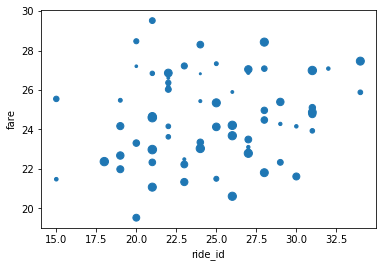

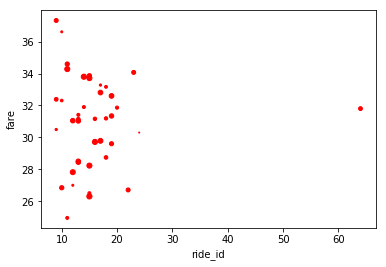

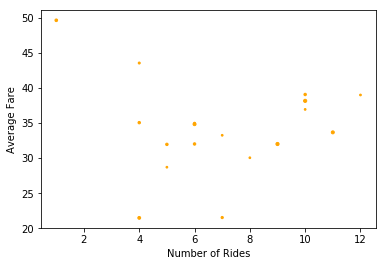

In [80]:
s=(urban_merge2['driver_count'])
urban_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s)

s=(suburban_merge2['driver_count'])
suburban_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s, Facecolors="red")

s=(rural_merge2['driver_count'])
rural_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s, Facecolors="orange")

plt.xlabel('Number of Rides')
plt.ylabel('Average Fare')
plt.show()

#grid=True, figsize=(10, 5)